# Demo of the Office-Home data loader

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from torchvision import transforms as T
from office_home import get_data_loaders, get_normalization_stats

In [ ]:
from office_home import office_home
df = pd.DataFrame(office_home)
print(f"domains: {','.join(set(df['domain']))}, number of classes: {len(set(df['label']))}")

MemoryError: 

In [2]:
readable_labels = ["Alarm Clock", "Backpack", "Batteries", "Bed", "Bike", "Bottle", "Bucket", "Calculator", "Calendar", "Candles", "Chair", "Clipboards", "Computer", "Couch", "Curtains", "Desk Lamp", "Drill", "Eraser", "Exit Sign", "Fan", "File Cabinet", "Flipflops", "Flowers", "Folder", "Fork", "Glasses", "Hammer", "Helmet", "Kettle", "Keyboard", "Knives", "Lamp Shade", "Laptop", "Marker", "Monitor", "Mop", "Mouse", "Mug", "Notebook", "Oven", "Pan", "Paper Clip", "Pen", "Pencil", "Postit Notes", "Printer", "Push Pin", "Radio", "Refrigerator", "Ruler", "Scissors", "Screwdriver", "Shelf", "Sink", "Sneakers", "Soda", "Speaker", "Spoon", "Table", "Telephone", "Toothbrush", "Toys", "Trash Can", "TV", "Webcam"]
domains = ["Art", "Clipart", "Product", "Real World"]

In [3]:
for d in domains:
    mean, std = get_normalization_stats(d)
    print(f"Normalization statistics excluding domain {d}:\n\tmean: {mean}\n\tstd:  {std}")

Normalization statistics excluding domain Art:
	mean: tensor([0.6514, 0.6297, 0.6074])
	std:  tensor([0.2099, 0.2110, 0.2179])
Normalization statistics excluding domain Clipart:
	mean: tensor([0.6426, 0.6185, 0.5941])
	std:  tensor([0.1947, 0.1972, 0.2041])
Normalization statistics excluding domain Product:
	mean: tensor([0.5836, 0.5559, 0.5248])
	std:  tensor([0.2086, 0.2082, 0.2144])
Normalization statistics excluding domain Real World:
	mean: tensor([0.6393, 0.6190, 0.5975])
	std:  tensor([0.2169, 0.2172, 0.2230])


In [50]:
train_loader, test_loader = get_data_loaders(target_domain="cartoon", train_batch_size=16, transform=T.Compose([T.Resize(256), T.CenterCrop(224), T.ToTensor()]))

Feature batch shape: torch.Size([16, 3, 224, 224])
Labels batch shape: torch.Size([16])


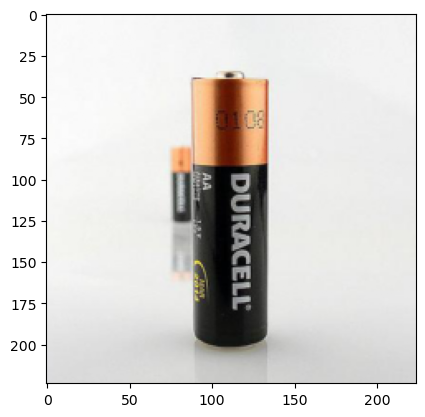

Label: 2 Batteries


In [ ]:
train_features, _train_domains, train_labels = next(iter(train_loader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img.permute(1, 2, 0), cmap="gray")
plt.show()
print(f"Label: {label} {readable_labels[label]}")